<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_5_1_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [23]:
import pandas as pd

#class 0 : red wine, class 1 : white wine
wine = pd.read_csv("https://bit.ly/wine_csv_data")

wine.info()
wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [24]:
print(wine.head(5))

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


#로지스틱 회귀로 찾을 때

In [25]:
from sklearn.model_selection import train_test_split

wine_input = wine[['alcohol','sugar','pH']].to_numpy()wine_target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target), lr.score(test_scaled, test_target))

0.7808350971714451 0.7776923076923077



#결정트리로 찾을 떄

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target), dt.score(test_input, test_target))

0.8454877814123533 0.8415384615384616


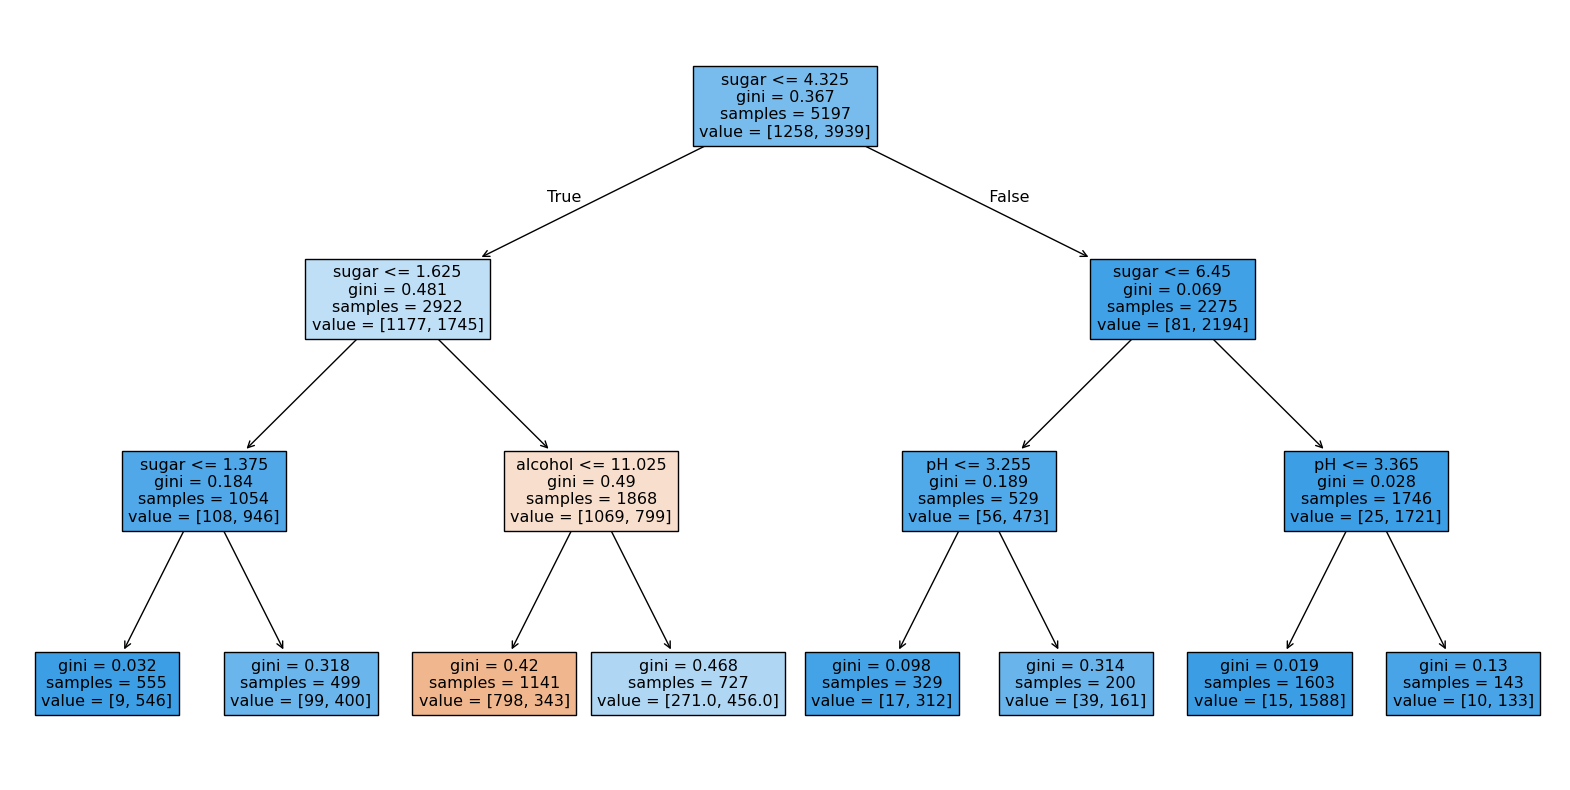

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10)) #크기 조절용

plot_tree(dt, filled = True, feature_names = ['alcohol','sugar','pH'])
plt.show()

In [53]:
#alcohol, sugar, pH
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

###+

0.8874350586877044 0.8615384615384616


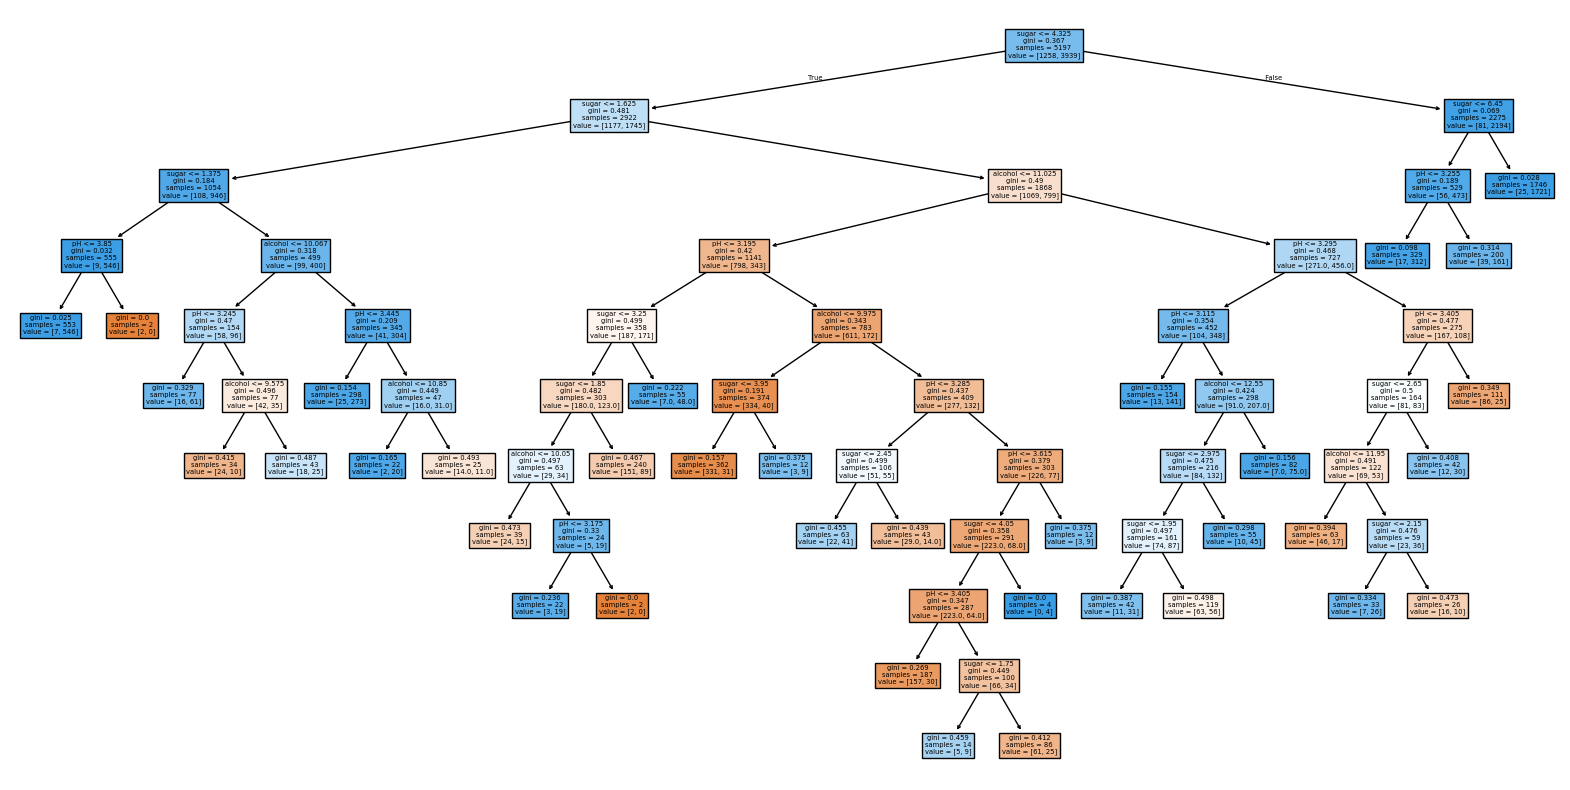

In [54]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target), dt.score(test_input, test_target))

plt.figure(figsize = (20,10))
plot_tree(dt, filled = True, feature_names = ['alcohol','sugar','pH'])
plt.show()